In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\salun\AppData\Local\Temp\ipykernel_15884\2309280963.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('layoffs_data.csv')

In [5]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Trigo,Tel Aviv,Retail,30.0,0.15,2024-01-04,https://www.calcalistech.com/ctechnews/article...,199.0,Series C,2024-01-05 00:29:13,Israel,Unknown
1,InVision,New York City,Product,NaN,1.00,2024-01-04,https://www.theinformation.com/briefings/desig...,356.0,Series F,2024-01-05 00:28:50,United States,Unknown
2,VideoAmp,Los Angeles,Marketing,NaN,0.20,2024-01-04,https://adage.com/article/measurement/videoamp...,456.0,Series F,2024-01-05 01:18:58,United States,Unknown
3,Orca Security,Tel Aviv,Security,60.0,0.15,2024-01-03,https://www.calcalistech.com/ctechnews/article...,632.0,Series C,2024-01-03 23:04:50,Israel,Unknown
4,Frontdesk,Milwaukee,Travel,200.0,1.00,2024-01-02,https://techcrunch.com/2024/01/02/short-term-r...,26.0,Unknown,2024-01-03 02:38:00,United States,Unknown


In [6]:
df.shape

(3282, 12)

In [7]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3282 non-null   object 
 1   Location_HQ                 3282 non-null   object 
 2   Industry                    3282 non-null   object 
 3   Laid_Off_Count              2167 non-null   float64
 4   Percentage                  2118 non-null   float64
 5   Date                        3282 non-null   object 
 6   Source                      3282 non-null   object 
 7   Funds_Raised                2934 non-null   float64
 8   Stage                       3282 non-null   object 
 9   Date_Added                  3282 non-null   object 
 10  Country                     3282 non-null   object 
 11  List_of_Employees_Laid_Off  3281 non-null   object 
dtypes: float64(3), object(9)
memory usage: 307.8+ KB


In [9]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,2167.000000,2118.000000,2934.000000
mean,241.968620,0.278266,777.297783
std,770.197639,0.281602,4909.452865
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.000000
50%,80.000000,0.175000,162.000000
75%,180.000000,0.300000,452.750000
max,12000.000000,1.000000,121900.000000


In [10]:
print("Missing Values")
(df.isna().mean() * 100).round(1)

Missing Values


Company                        0.0
Location_HQ                    0.0
Industry                       0.0
Laid_Off_Count                34.0
Percentage                    35.5
Date                           0.0
Source                         0.0
Funds_Raised                  10.6
Stage                          0.0
Date_Added                     0.0
Country                        0.0
List_of_Employees_Laid_Off     0.0
dtype: float64

In [11]:
df.dropna(inplace = True)
df.isna().mean()

Company                       0.0
Location_HQ                   0.0
Industry                      0.0
Laid_Off_Count                0.0
Percentage                    0.0
Date                          0.0
Source                        0.0
Funds_Raised                  0.0
Stage                         0.0
Date_Added                    0.0
Country                       0.0
List_of_Employees_Laid_Off    0.0
dtype: float64

In [12]:
print('Amount of Duplicates: {:,}'.format(df.duplicated().sum()))
df.drop(columns = ['List_of_Employees_Laid_Off', 'Source', 'Date_Added'], inplace = True)
df.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

Amount of Duplicates: 0


In [13]:
def detect_outliers(df, column_names):
    # Calculate the number of columns and rows for subplots
    col_len = len(column_names)
    num_columns = min(col_len, 3)
    num_rows = 2 * ((col_len + num_columns - 1) // num_columns)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 3 * num_rows), squeeze = False)

    # Initialize a list to store outlier information for each column
    outlier_data = []

    # Iterate over column_names and create subplots
    for i, column_name in enumerate(column_names):
        data = df[column_name]

        # Calculate quartiles and interquartile range using np.percentile
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1

        # Define lower and upper limits for outlier detection
        low_lim, upp_lim = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Find and display outliers
        outliers = df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(df) * 100, 1)

        # Append outlier information to the list
        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        # Calculate row and column indices for plotting
        row_index, col_index = divmod(i, num_columns * 2)

        # Create a boxplot to visualize the distribution and detect outliers
        ax_box, ax_hist = axes[row_index, col_index], axes[row_index + 1, col_index]
        sns.boxplot(x = data, ax = ax_box)
        ax_box.set(title = column_name.capitalize(), xlabel = None)
        ax_box.axvline(low_lim, color = 'brown', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        ax_box.axvline(upp_lim, color = 'brown', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        ax_box.legend()

        # Create a histogram below the boxplot
        sns.histplot(data, bins = 20, ax = ax_hist, color = 'purple')
        ax_hist.set(xlabel = None)
        ax_hist.set_yscale('log')  # Set y-axis scale to logarithmic
        ax_hist.set_ylabel(None)  # Disable y-axis label

    # Display the subplots
    plt.tight_layout()
    plt.figtext(0.4, 0.01, 'Author: Himanshu Salunke', ha='center', va='center', fontsize=10, color='gray')
    plt.savefig('layoff_percent.png')
    plt.show()

    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

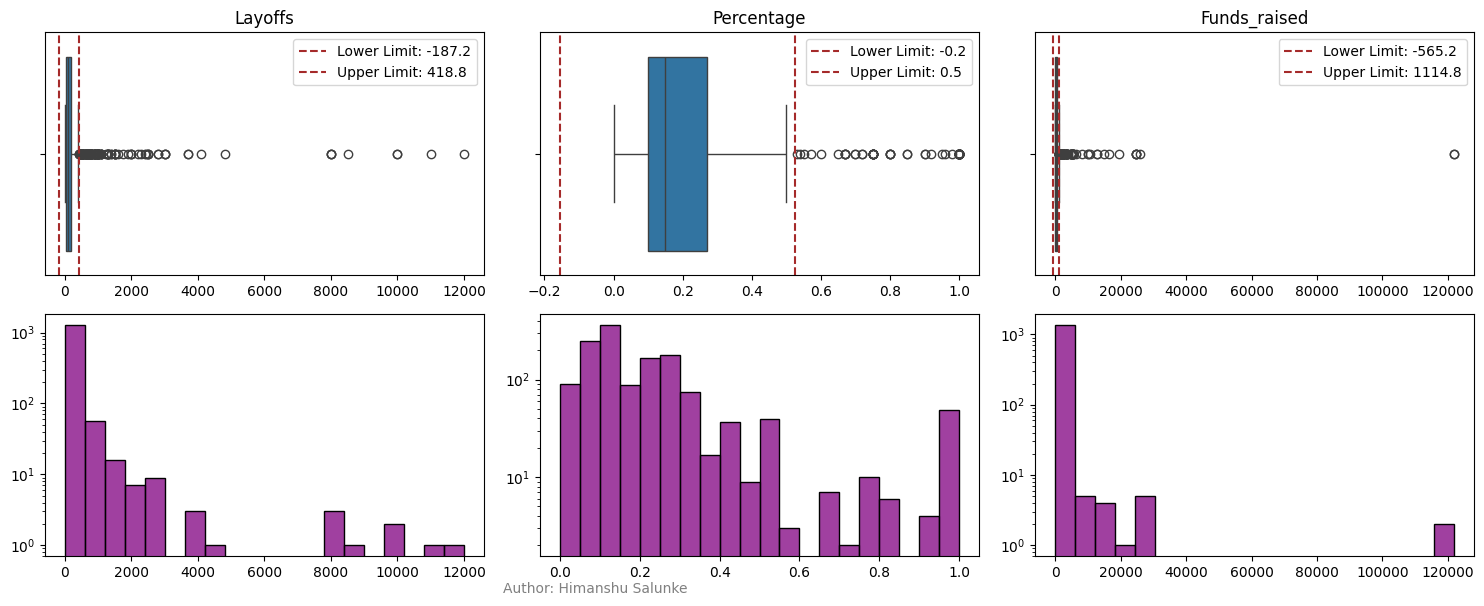

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,Layoffs,147,10.6,-187.2,418.8
1,Percentage,83,6.0,-0.2,0.5
2,Funds_Raised,143,10.3,-565.2,1114.8


In [14]:
outlier_col = df.select_dtypes(include = 'float').columns
detect_outliers(df, outlier_col)

In [15]:
clean_df = df.query('Percentage < 0.6 and Funds_Raised < 1108.2 and Layoffs < 416.2')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 3280
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1098 non-null   object 
 1   Location_HQ   1098 non-null   object 
 2   Industry      1098 non-null   object 
 3   Layoffs       1098 non-null   float64
 4   Percentage    1098 non-null   float64
 5   Date          1098 non-null   object 
 6   Funds_Raised  1098 non-null   float64
 7   Stage         1098 non-null   object 
 8   Country       1098 non-null   object 
dtypes: float64(3), object(6)
memory usage: 85.8+ KB


In [16]:
fig_industries_box = px.box(
    clean_df, 
    x = 'Industry', 
    y = 'Layoffs',
    title = 'Layoffs Across Industries',
    color = 'Industry'
)

fig_industries_box.update_layout(title_x = 0.5)
fig_industries_box.show()

c:\Users\salun\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [17]:
fig_funds = px.scatter(
    clean_df,
    x = 'Funds_Raised',
    y = 'Layoffs',
    title = 'Layoffs vs. Funds Raised by Industry',
    color = 'Industry',
    hover_name = 'Company',
    labels = {'Funds_Raised': 'Funds Raised in Millions'}
)

# Formatting title and x-axis
fig_funds.update_layout(
    title_x = 0.5,
    xaxis_tickprefix = '$',
    xaxis_tickformat = ',.0f'
)

fig_funds.update_traces(marker = {'line': {'color': '#B64FDA', 'width': 1}})
fig_funds.show()

c:\Users\salun\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
clean_df.loc[:, 'Date'] = pd.to_datetime(clean_df['Date'])

date_layoffs = (
    clean_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Time series plot for layoffs over time
fig_date = px.line(
    date_layoffs,
    x = 'Date',
    y = 'Layoffs',
    title = 'Trend of Layoffs',
    template = 'plotly_dark'
)

fig_date.update_layout(title_x = 0.5)
fig_date.update_traces(line_color = 'red')

fig_date.show()

In [19]:
df_sorted_date = clean_df.sort_values(by = 'Date')
df_sorted_date['Cumulative_Layoffs'] = df_sorted_date['Layoffs'].cumsum()

# Enhanced time series for cumulative layoffs over time
fig_cum_date = px.line(
    df_sorted_date,
    x = 'Date',
    y = 'Cumulative_Layoffs',
    title = 'Layoffs Over Time',
    template = 'plotly_dark',
    labels = {'Cumulative_Layoffs': 'Number of Layoffs'}
)

fig_cum_date.update_layout(title_x = 0.5)
fig_cum_date.update_traces(line = dict(color = 'blue', width = 2.5))

fig_cum_date.show()

In [20]:
company_layoffs = (
    clean_df
    .groupby('Company')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

# Bar chart for companies with the highest number of layoffs
fig_company = px.bar(
    company_layoffs,
    x = 'Company',
    y = 'Layoffs',
    title = 'Companies with the Highest Layoffs',
    color = company_layoffs.index.isin(company_layoffs.head(1).index).astype(str),
    color_discrete_map = {'False': 'purple', 'True': 'brown'}
)

fig_company.update_layout(
    title_x = 0.5, 
    showlegend = False
)

fig_company.show()

c:\Users\salun\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
country_layoffs = (
    clean_df
    .groupby('Country')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)

# Bar chart for total layoffs by country
fig_country_layoffs = px.bar(
    country_layoffs, 
    x = 'Country', 
    y = 'Layoffs', 
    title = 'Total Layoffs by Country', 
    color = np.where(country_layoffs.index == 0, True, False),
    color_discrete_map = {True: 'purple', False: 'brown'}
)

fig_country_layoffs.update_layout(title_x = 0.5, showlegend = False)

fig_country_layoffs.show()

c:\Users\salun\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [22]:
country_layoffs = (
    clean_df
    .groupby('Country')['Layoffs']
    .sum()
    .reset_index()
)

# Map visualization for countries with layoffs
fig_country = px.choropleth(
    country_layoffs, 
    locations = 'Country',
    locationmode = 'country names',
    hover_name = 'Country',
    title = 'Layoffs by Country',
    color = 'Layoffs',
    color_continuous_scale = px.colors.sequential.Magenta
)

fig_country.update_layout(title_x = 0.5)

fig_country.show()